In [ ]:
"""
Purpose: Grab Screenshots of an example Neuron going through the pipeline




"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")

In [2]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import time

INFO - 2020-11-30 17:59:22,770 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-30 17:59:22,771 - settings - Setting database.user to celiib
INFO - 2020-11-30 17:59:22,772 - settings - Setting database.password to newceliipass
INFO - 2020-11-30 17:59:22,776 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-11-30 17:59:22,777 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-30 17:59:22,789 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-11-30 17:59:22,986 - settings - Setting enable_python_native_blobs to True


In [3]:
minnie,schema = du.configure_minnie_vm()

INFO - 2020-11-30 18:08:42,409 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-30 18:08:42,676 - settings - Setting enable_python_native_blobs to True


In [18]:
minnie.Decomposition() & "n_limbs > 8"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134884740858,0,0.25,=BLOB=,581524,1173901,0,0,0,1,9,396,182,9105762.417662341,4417913.111483511,14003.905,75.417,75.417,362.451,321.41,1506,0.00016538977527887498,3.803030303030303,3333922.996,110,nan,nan,65843283280.180756,25258010.27633667,7230.946763168926,19749.491322738624,598575302.5470978,1069.7304
864691134884741370,0,0.25,=BLOB=,380482,782797,0,0,0,1,9,272,202,5447324.215061565,3642525.6251928546,9876.813,79.649,79.649,270.025,257.602,885,0.00016246508653790454,3.2536764705882355,2309022.528,72,nan,nan,68769148892.91443,46189481.963336304,12624.39065087614,29782.796858409183,955127067.9571449,553.3898
864691134884741882,0,0.25,=BLOB=,843280,1700959,2,2,0,1,10,583,190,9413167.750364104,3368032.161881765,7808.186,114.566,114.566,435.79,391.447,3034,0.00032231445146429523,5.204116638078903,4757150.4,249,nan,nan,191374383459.08017,42245315.42166233,20330.497504591665,40228.78558960006,768571821.120804,4240.5491
864691134884744442,0,0.25,=BLOB=,2352657,4719324,0,0,0,1,14,1910,1218,44202636.12452996,29306464.2025164,13814.875,72.004,72.004,205.046,205.046,986,2.2306361937830804e-05,0.5162303664921466,9562491.736,322,nan,nan,22582748683.265686,10709847.398497581,510.8914459229173,2361.5966744575794,70132759.88591827,18359.3356
864691134884744698,0,0.25,=BLOB=,304543,628181,0,0,0,1,10,70,33,2634200.0059194006,885115.1823259087,20120.099,346.007,289.963,530.781,486.643,1337,0.0005075544746016179,19.1,2512380.749,55,nan,nan,93846781256.14755,46434873.98150507,35626.29300936195,37353.725661805554,1706305113.7481372,1212.3084
864691134884748026,0,0.25,=BLOB=,420027,845933,0,0,0,1,9,126,48,4414544.210416046,1294656.0293478586,18646.872,170.324,170.324,398.857,349.585,1827,0.0004138592599637405,14.5,3133304.503,66,nan,nan,140957072770.01,49417501.9646492,31930.153159962487,44986.71375062649,2135713223.7880304,2051.3084
864691134884749306,0,0.25,=BLOB=,128236,263233,0,0,0,1,11,167,92,3010544.736947266,2052506.8808528048,11970.928,70.242,70.242,133.924,133.924,0,0.0,0.0,33131.555,7,nan,nan,0.0,0.0,0.0,0.0,0.0,542.4385
864691134884749562,0,0.25,=BLOB=,601749,1218939,0,0,0,1,9,278,100,9516993.070636472,3679919.833727774,20041.486,77.39,77.39,341.087,310.914,1160,0.0001218872380583148,4.1726618705035

In [19]:
current_table = (minnie.AutoProofreadLabels() & "n_face_errors>200000") & (minnie.Decomposition() & "n_limbs > 8").proj()
current_table

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_face_errors the number of faces that were errored out,face_idx_for_error the face indices for the errors computed,n_synapses total number of synpases,n_errored_synapses the number of synapses
864691134884741370,0,0.25,208443,=BLOB=,469,207
864691134884744442,0,0.25,3345139,=BLOB=,7028,5096
864691134884749562,0,0.25,205172,=BLOB=,1089,422
864691134940001635,0,0.25,214404,=BLOB=,247,49
864691134964412959,0,0.25,386881,=BLOB=,864,467
864691134964462367,0,0.25,230111,=BLOB=,537,238
864691135012371958,0,0.25,268440,=BLOB=,401,86
864691135012382710,0,0.25,209566,=BLOB=,272,95
864691135012491766,0,0.25,1258890,=BLOB=,2600,2022
864691135012513270,0,0.25,310835,=BLOB=,0,0


# Picking A Neuron to Look at

In [20]:
possible_seg_ids = current_table.fetch("segment_id")

In [25]:
curr_seg_id = possible_seg_ids[40]
print(f"Segment_id = {curr_seg_id}")
curr_seg_id = 864691134884742906
du.plot_errored_faces(curr_seg_id,plot_synapses=True)

Segment_id = 864691135233107289
Decompressing Neuron in minimal output mode...please wait
Returning the 1) coordinates for errored synapses 2) Coordinates for non-errored synapses


# Visualizing the Results

In [27]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=curr_seg_id)).fetch("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [30]:
neuron_obj = neuron_obj[0]

In [34]:
nviz.plot_objects(main_mesh=neuron_obj.mesh,mesh_alpha=1,
                 meshes=[neuron_obj["S0"].mesh],
                 meshes_colors="red")

In [37]:
nviz.plot_objects(skeletons=[neuron_obj.skeleton],
                 skeletons_colors="black",mesh_alpha=1,
                 meshes=[neuron_obj["S0"].mesh],
                 meshes_colors="red")

In [ ]:
ret_col = nviz.visualize_neuron(neuron_obj,visualize_type=["mesh"],
                     limb_branch_dict=dict(L3="all"),
                      network_color_alpha=1,
                                network_soma_alpha=1,
                                
                    node_size=5,
                                arrow_size=3,
                                arrow_alpha=1,
                                
                     return_color_dict=True)

In [86]:
ret_col = nviz.visualize_neuron(neuron_obj,visualize_type=["mesh"],
                     limb_branch_dict=dict(L3=[3]),
                                mesh_color="aqua",
                                mesh_color_alpha=1,
                                mesh_soma_alpha=1,
                                
                                #network
#                                 network_color_alpha=1,
#                                 network_soma_alpha=1,
#                                 node_size=2,
#                                 arrow_size=1.5,
#                                 arrow_alpha=1,
                                return_color_dict=True)


 Working on visualization type: mesh
Working on  new stand alone scatter points


In [88]:
dir(neuron_obj["L3"][3])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'compute_spines_volume',
 'endpoints',
 'labels',
 'mesh',
 'mesh_center',
 'mesh_face_idx',
 'skeleton',
 'spines',
 'spines_volume',
 'width',
 'width_array',
 'width_new']

In [95]:
curr_branch = neuron_obj["L3"][3]

(276.94433318703756, 290.46714887322827)

In [ ]:
"""
How to plot the spines

1) Get the spine meshes
2) Subtract from the regular mesh
3) Plot botht he subtracted mesh and the spines

"""

In [115]:
# plotting the spines

shaft_mesh = tu.subtract_mesh(curr_branch.mesh,curr_branch.spines)
soma_mesh  = neuron_obj["S0"].mesh
nviz.plot_objects(main_mesh=shaft_mesh,
                 main_mesh_color="aqua",
                 meshes=curr_branch.spines + [soma_mesh],
                  meshes_colors="red",
                 mesh_alpha=1,
                 skeletons=[curr_branch.skeleton])

In [114]:
import numpy as np
np.round(curr_branch.width_array["no_spine_median_mesh_center"],0)

array([250., 223., 311., 287., 253., 263., 254., 298., 289., 393., 267.,
       364., 399., 302., 357., 340., 322., 250., 276., 241., 260., 445.,
       426., 353., 329., 306., 273., 233., 288., 319., 292., 257., 200.,
       338., 298., 249., 213., 388., 332., 485., 368., 250., 280., 301.,
       319., 250., 246., 285., 343., 312., 261., 208., 209., 262., 267.,
       245., 208., 199., 221., 278., 313., 291., 285., 244., 181., 407.,
       190., 188., 119., 130., 202., 341., 160., 363., 215., 239., 133.,
       431., 346., 289., 310., 370., 214., 248., 259., 293., 205., 277.])

In [110]:
curr_branch.width_new["no_spine_median_mesh_center"],curr_branch.width_new["median_mesh_center"]

(276.94433318703756, 290.46714887322827)

In [ ]:
width
spines
spines_volume

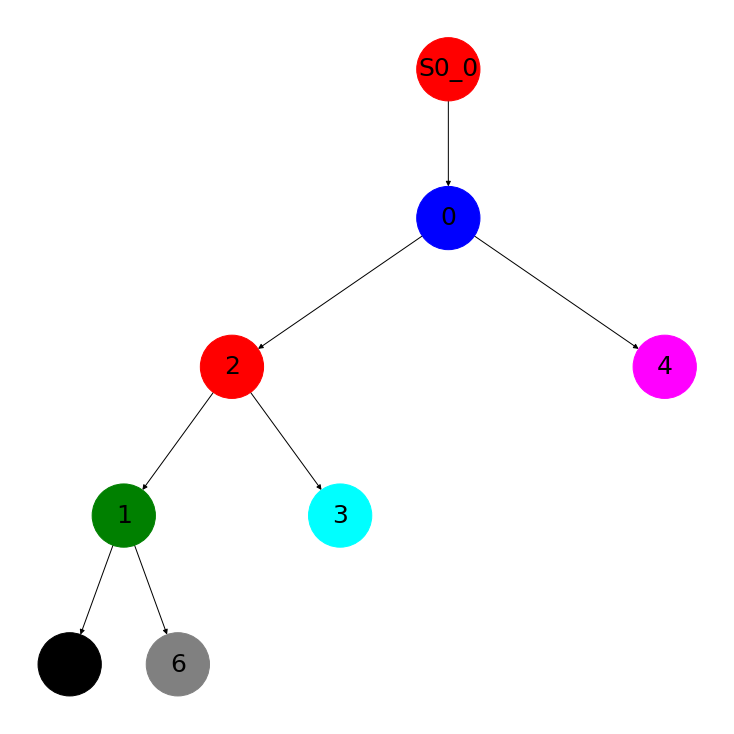

In [81]:
nviz.plot_limb_concept_network_2D(neuron_obj,
                                  limb_name="L3",
                                  node_colors=ret_col,
                                  font_size=25,
                                 node_size=4000,
                                  width_min = 0.1,
                                  fig_width=10,
                                  fig_height=10,
                                  font_color="black",
                                  
                                 pos_width=2)

In [64]:
ret_col = nviz.visualize_neuron(neuron_obj,visualize_type=["mesh"],
                     limb_branch_dict="all",
                      mesh_color_alpha=0.4,
                     mesh_soma_alpha=1,
                    mesh_resolution="limb",
                     return_color_dict=True)


 Working on visualization type: mesh
Working on  new stand alone scatter points


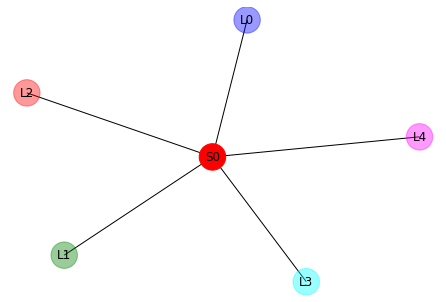

In [65]:
# Plotting one of the concept networks
nviz.plot_soma_limb_concept_network(neuron_obj,node_colors=ret_col,
                                    font_color="black",
                                    node_size=700
                                   )

# Plotting the different limbs

In [ ]:
nviz.visualize_neuron()

# Plotting the Errored Faces and Synapses

In [ ]:
du.plot_errored_faces(curr_seg_id,plot_synapses=True)

NameError: name 'segment_id' is not defined

In [119]:
segment_id = curr_seg_id
plot_synapses=True
current_mesh=neuron_obj.mesh
neuron_obj
valid_synapse_color = "yellow"
error_color = "red"

In [132]:
import error_detection as ed

#1) Pull down the mesh
if current_mesh is None:
    current_mesh = fetch_segment_id_mesh(segment_id)

#2) PUll down the synapse data and the error faces
n_synapses,n_errored_synapses,errored_faces = (minnie.AutoProofreadLabels() &
                                               dict(segment_id=segment_id)).fetch1("n_synapses","n_errored_synapses","face_idx_for_error")

error_submesh = current_mesh.submesh([errored_faces],append=True)
valid_mesh = tu.subtract_mesh(current_mesh,error_submesh)

if neuron_obj is None:
    neuron_obj = (minnie.Decomposition() & dict(segment_id=segment_id)).fetch1("decomposition")

err_synapses,non_err_synapses = ed.get_error_synapse_inserts(current_mesh,segment_id,
                                                     errored_faces,return_synapse_centroids=True)
if plot_synapses:


    nviz.plot_objects(main_mesh=valid_mesh,
              meshes=[error_submesh],
                      mesh_alpha=1,
              meshes_colors=[error_color],
            scatters=[err_synapses,non_err_synapses],
             scatters_colors=[error_color,valid_synapse_color])
    if return_obj:
        return_value= neuron_obj

else:
    nviz.plot_objects(main_mesh=valid_mesh,
             meshes=error_submesh,
              meshes_colors=error_color,
             mesh_alpha=1)

Returning the 1) coordinates for errored synapses 2) Coordinates for non-errored synapses


# Plotting just the neuron

In [127]:
nviz.plot_objects(meshes=[current_mesh],
                  meshes_colors=["aqua"],
             mesh_alpha=0.6)

In [128]:
nviz.plot_objects(meshes=[valid_mesh,error_submesh],
                  meshes_colors=["aqua","red"],
             mesh_alpha=0.6)

In [133]:
nviz.plot_objects(meshes=[valid_mesh],
                  meshes_colors=["aqua"],
                  scatters=[non_err_synapses],
             scatters_colors=[valid_synapse_color],
             mesh_alpha=0.6)

In [138]:
nviz.plot_objects(meshes=[error_submesh],
                  meshes_colors=["red"],
                  scatters=[err_synapses],
             scatters_colors=["purple"],
             mesh_alpha=1)

# Getting the Different Limbs

In [ ]:
dict(L0=”purple”,L1=”green”,L2=”orange”,L3=”aqua”,L4=”pink”)

In [149]:
color_dict = dict(L0="blue",L1="green",L2="red",L3="aqua",L4="pink")
curr_l_d_dict= dict(L3="all")
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh"],
                      mesh_color_alpha=1,
                     limb_branch_dict=curr_l_d_dict,
                      mesh_resolution="limb",
                      mesh_soma_alpha=1,
                     mesh_color=color_dict)


 Working on visualization type: mesh
Working on  new stand alone scatter points
